In [493]:
import plotly.graph_objects as go
import kaleido
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image

CSV_PATH = './csv-files/'
IMAGE_PATH = './images/'

global_font = dict(
    family="Arial, sans-serif",  # Change to preferred font
    size=14,  # Set font size
    color="black"  # Set font color
)

plt.rc("font", family="Arial", size=14)


pd.set_option('display.max_columns', None)

# Bar Assignment

## Visualisation of CSV file

In [494]:
bar_df = pd.read_csv(CSV_PATH + "bar_assignment.csv", sep = ",")
bar_df.head(bar_df.size)

,LABEL,COUNT
0,D,1
1,D,1
2,D,0
3,D,1
4,F,1
5,F,1
6,F,0
7,F,0
8,I,1
9,N,1


## Graph

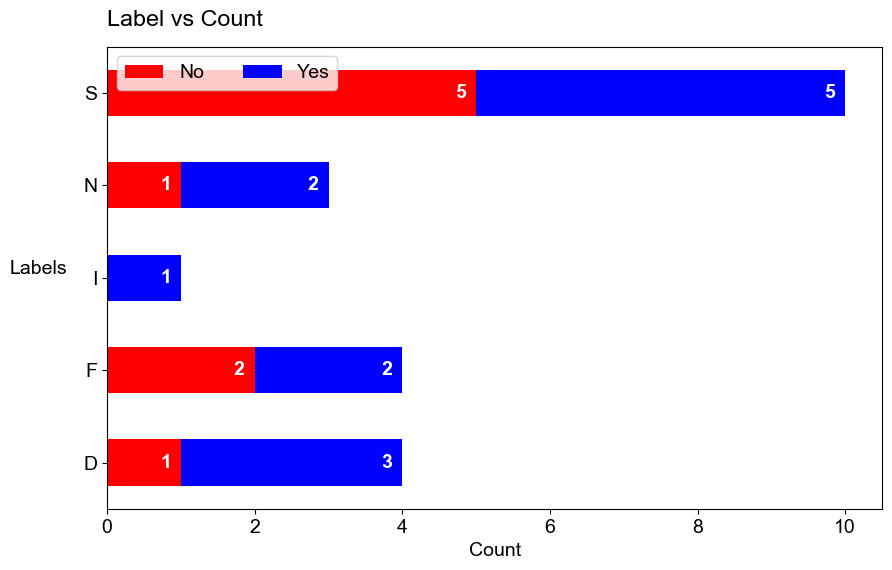

In [495]:
bar_df["COUNT"] = bar_df["COUNT"].map({1: "Yes", 0: "No"})
bar_pivot = bar_df.pivot_table(index="LABEL", columns="COUNT", aggfunc="size", fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
bars = bar_pivot.plot(kind="barh", stacked=True, ax=ax, color=['red', 'blue'])
    
for container in ax.containers:
    labels = [int(val) if val > 0 else "" for val in container.datavalues]  # Remove zero labels
    ax.bar_label(container, labels=labels, color='white', padding=-15, fontweight='bold')

# Title and labels
plt.title("Label vs Count", loc='left',pad=15)
plt.ylabel('Labels', rotation=0, labelpad=32)
plt.xlabel('Count')

# Legend
plt.legend(loc='upper left', ncols=2)

# Save and show
bar_chart_path = IMAGE_PATH + "bar_graph.png"
plt.savefig(bar_chart_path, bbox_inches="tight")
plt.show()


# Sankey Assignment

## Visualization of CSV File

In [496]:
sankey_df = pd.read_csv(CSV_PATH + "sankey_assignment.csv")
sankey_df.head(sankey_df.size)

,LABEL,PS,OMP,CNP,NRP,NMCCC,PEC,NCDM,RGS,Reg,Aca,Oth
0,S,3,4,1,1,0,0,1,1,2,7,1
1,F,0,1,2,1,1,0,0,1,2,2,0
2,D,1,1,2,0,0,0,1,1,1,3,1
3,N,1,1,1,1,0,1,1,0,2,2,1
4,I,0,1,0,0,0,0,0,0,0,1,0


## Graph

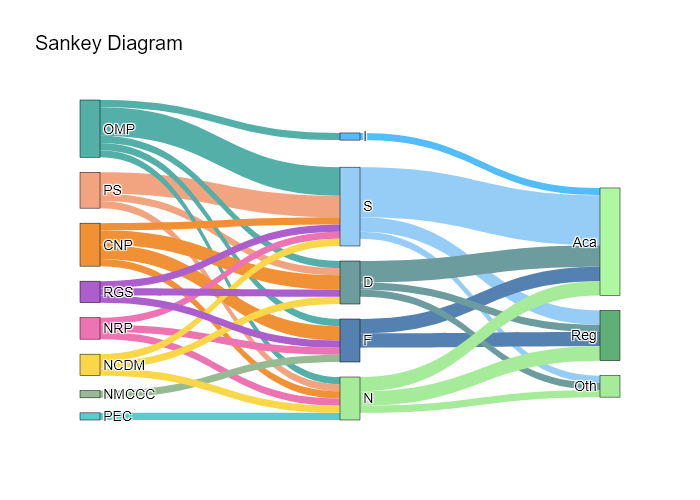

In [497]:
# Define node groups
start_nodes = list(sankey_df.columns[1:9])
middle_nodes = list(sankey_df['LABEL'].unique())
end_nodes = list(sankey_df.columns[9:])

# Combine all nodes in order (start → middle → end)
all_nodes = start_nodes + middle_nodes + end_nodes

# Map node names to indices
node_indices = {node: idx for idx, node in enumerate(all_nodes)}

# Lists to store Sankey link data
source = []
target = []
value = []

# **First Set of Links (start → middle)**
for start in start_nodes:
     for mid in middle_nodes:
            val = sankey_df.loc[sankey_df['LABEL'] == mid, start].values[0]
            if val > 0:
                source.append(node_indices[start])  # Source index
                target.append(node_indices[mid])    # Target index
                value.append(val)                   # Flow value
      

# **Second Set of Links (middle → end)**
for mid in middle_nodes:
    for end in end_nodes:
            val = sankey_df.loc[sankey_df['LABEL'] == mid, end].values[0]
            if val > 0:
                source.append(node_indices[mid])   # Source index
                target.append(node_indices[end])   # Target index
                value.append(val)                  # Flow value
               
label_colors = [
    '#F2A481', # PS
    '#54AFA9', # OMP
    '#F09135', # CNP
    '#ED74B2', # NRP
    '#98BA93', # NMCCC
    '#5CCBCF', # PEC
    '#F9D749', # NCDM
    '#AD5ECD', # RGS
    '#96CDF6', # S
    '#5481B0', # F
    '#6D9C9F', # D
    '#A6EB99', # N 
    '#53BDF9', # I
    '#5FB076', # Reg
    '#AFF8A2', # Aca
    '#A6EB99' # Oth
]

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = all_nodes,
      color = label_colors,
    ),
    link = dict(
        source = source,
        target = target, 
        value = value,
        color = [label_colors[s] for s in source]
  ))])

# Set title
fig.update_layout(title_text="Sankey Diagram", font=global_font)

# **Save as Image**
fig.write_image(IMAGE_PATH + "sankey_diagram.png")  # Saves as PNG
# fig.show()  # Displays the diagram

Image(IMAGE_PATH + "sankey_diagram.png")

# Network Assignment

## Visualization of CSV File

In [498]:
network_df = pd.read_csv(CSV_PATH + "networks_assignment.csv")
network_df.head(network_df.size)

,LABELS,N,D,F,I,S,AUT,BEL,BIH,BGR,HRV,CZE,EST,FRA,GEO,DEU,GRC,HUN,IRL,ISR,ITA,LVA,LUX,MNE,NLD,PRT,ROU,SRB,SVK,SVN,ESP,CHE,TUR,UKR,GBR,AUS,HKG,ASU
0,D,3,0,3,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,1
1,F,1,2,0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,2,1,1,0,1,1,2,1,0,0,2,0,0,0
2,I,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,0,2,2,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,2,1,0,1
4,S,5,4,3,3,0,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,0,2,2,4,2,2,2,0,0,2,2,2,2,3,1,1,1


## Graph

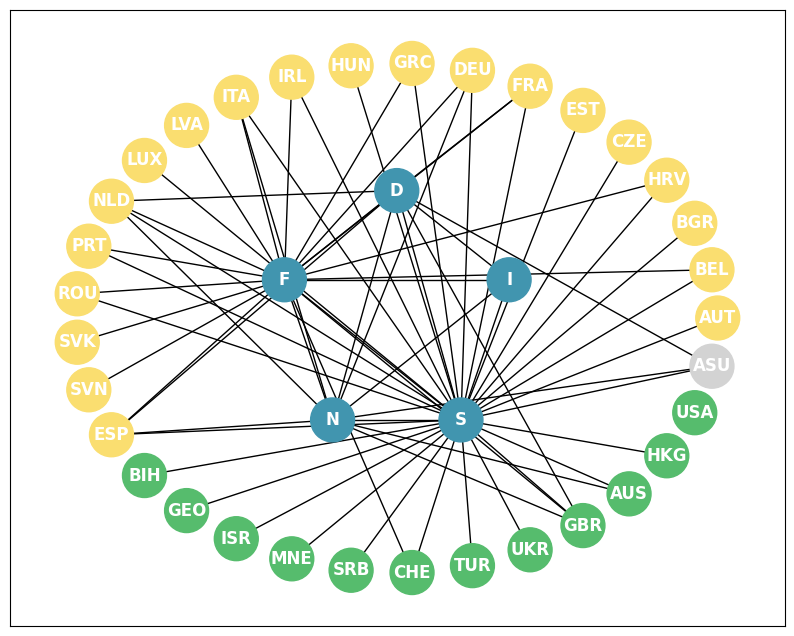

In [499]:
# Nodes
blue_nodes = ['D' ,'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

# Start with predefined node groups
nodes = blue_nodes + yellow_nodes + green_nodes

# Add any nodes from the CSV that aren't already included. To sort the nodes
for node in network_df.columns:
    if node != "LABELS" and node not in nodes:
        nodes.append(node)

# Edge List
edges = []

# Temporary lists to store edges by category
blue_edges = []
green_edges = []
yellow_edges = []
other_edges = []

for i, row in network_df.iterrows():
    source = row["LABELS"]
    for target, weight in row.iloc[1:].items():
        if weight > 0:  # Only keep actual edges
            if source in blue_nodes and target in blue_nodes:
                blue_edges.append((source, target))
            elif source in green_nodes and target in green_nodes:
                green_edges.append((source, target))
            elif source in yellow_nodes and target in yellow_nodes:
                yellow_edges.append((source, target))
            else:
                other_edges.append((source, target))  # Unclassified edges

# Append edges in the correct order
edges = blue_edges + green_edges + yellow_edges + other_edges

G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Get all nodes that are NOT in blue_nodes
non_blue_nodes = [node for node in G.nodes if node not in blue_nodes]

# Apply circular layout to only the non-blue nodes
pos = nx.circular_layout(G.subgraph(non_blue_nodes), center=(0, 0), scale=1.0)

pos.update({
    'D': np.array([0, 0.5]),
    'F': np.array([-0.35, 0.15]),
    'I': np.array([0.35, 0.15]),
    'N': np.array([-0.20, -0.4]),
    'S': np.array([0.20, -0.4])
})

colors = [
    '#4195AF' if node in blue_nodes else 
    '#56BC6D' if node in green_nodes else 
    '#FADE70' if node in yellow_nodes else 
    'lightgray'
    for node in nodes
]

plt.figure(figsize=(10, 8))

# Draw graph
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=1000)
nx.draw_networkx_labels(G, pos, font_weight='bold', font_color='white')
nx.draw_networkx_edges(G, pos, arrows=False, edge_color='black')

# Save image to IMAGE_PATH
plt.savefig(IMAGE_PATH + 'network_graph.png', bbox_inches="tight")
plt.show()

# Collated Graphs